In this notebook, We are creating image using Text-to-image stable diffusion

more on https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/text2img

# Install & Import

In [ ]:
!pip install diffusers==0.16.1
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.7 MB/s eta 0:00:00


In [ ]:
import torch
from PIL import Image
from diffusers import StableDiffusionPipeline
import numpy as np

# 1) Text-to-image

In [ ]:
# @title Choose pretrained model
model_name = "runwayml/stable-diffusion-v1-5" # @param {type:"string"}

txt2img = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16)
txt2img = txt2img.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
# @title Adjust Parameters
seed = 45700 # @param {type:"integer"}
torch.cuda.manual_seed(seed)
sentence_1 = 'masterpiece, photorealistic rendering, game cg cinematic, best quality, ultra high res, fantasy,' # @param {type:"string"}
sentence_2 = '((underwater)), ((a gate in front)),  a sunken highly detailed city of Atlantis can be seen in the background, ((floating particles)),' # @param {type:"string"}
sentence_3 = 'a school of fish, dust, god rays, (highres)' # @param {type:"string"}
style = 'Realistic' # @param {type:"string"}

prompt = ', '.join([sentence_1, sentence_2, sentence_3, style])
negative_prompt = 'Corrupted, deformed, birds, arcs' # @param {type:"string"}
size = 896 # @param {type:"slider", min:512, max:1024, step:128}
image_ratio = "4:3" # @param ["1:1", "4:3", "3:4", "9:16", "16:9"]
w, h = image_ratio.split(":")
w = int(w)
h = int(h)
w, h = (w/max((h,w)), h/max((h,w)))

if len(negative_prompt) == 0:
  negative_prompt = None
num_inference_steps = 25 # @param {type:"slider", min:20, max:50, step:5}
guidance_scale = 7.5 # @param {type:"slider", min:0, max:10, step:0.5}
img = txt2img(prompt=prompt,
               width = int(w*size),
               height = int(h*size),
                  num_inference_steps=num_inference_steps,
                  guidance_scale=guidance_scale,
                  negative_prompt=negative_prompt).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

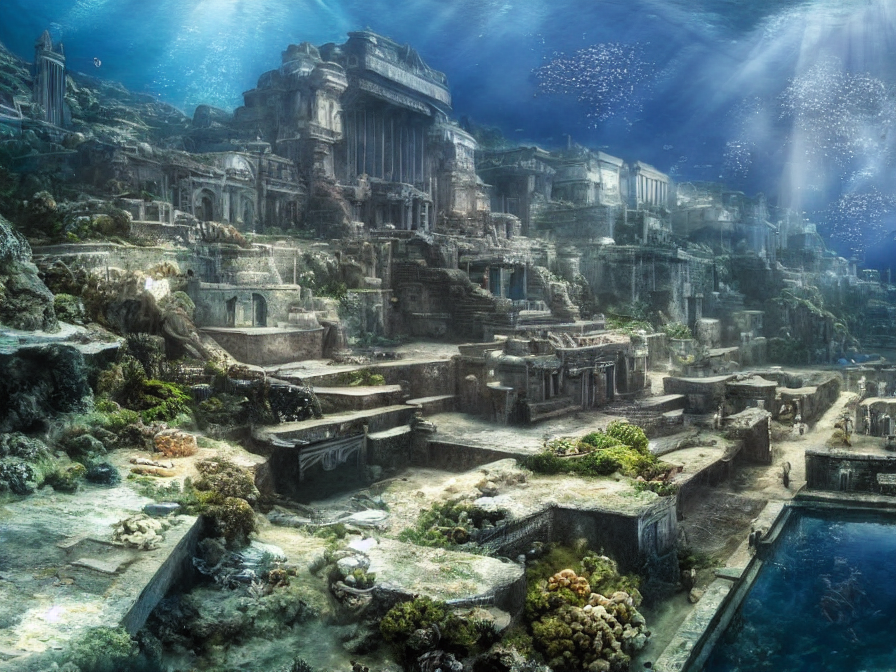

In [ ]:
img

Example prompt is edited from this [original version](https://prompthero.com/prompt/3fb6897703d)